# <font color='green'>Making Business Decisions Based on Data- Project-online store

**<font color='green'>Project description:**
    
<font color='green'>You are an analyst at a big online store. Together with the marketing
department, you've compiled a list of hypotheses that may help boost revenue.
    
<font color='green'>You need to prioritize these hypotheses, launch an A/B test, and analyze the
results.

In [1]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statistics
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import figure
import datetime
import numpy as np
import seaborn as sns
from functools import reduce
import math
from scipy import stats as st
from scipy import stats

import datetime as dt
import matplotlib.pyplot as plt


**<font size="5"><font color='green'>prepare the data:**

**<font size="4"><font color='green'>Hypotheses Table**

In [2]:
try:
    hypotheses_data= pd.read_csv(r'C:\Users\keren\Desktop\data analyst\Making Business Decisions Based on Data\project\moved_hypotheses_us.csv',sep=';')  
except:
    hypotheses_data= pd.read_csv(r'/datasets/hypotheses_us.csv',sep=';')

In [3]:
hypotheses_data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [4]:
hypotheses_data.columns= hypotheses_data.columns.str.lower()

In [5]:
hypotheses_data.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [6]:
hypotheses_data.isna().sum()


hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

In [7]:
hypotheses_data.duplicated().sum()


0

**<font size="4"><font color='green'>Orders Table**

In [8]:
try:
    orders_data= pd.read_csv(r'C:\Users\keren\Desktop\data analyst\Making Business Decisions Based on Data\project\moved_orders_us.csv')  
except:
    orders_data= pd.read_csv(r'/datasets/orders_us.csv')

In [9]:
orders_data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


In [10]:
orders_data

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [11]:
def read_orders(path):
    return pd.read_csv( path,
        parse_dates=['date'],)

try:
    orders_data= read_orders(r'C:\Users\keren\Desktop\data analyst\Making Business Decisions Based on Data\project\moved_orders_us.csv')
except FileNotFoundError:
    orders_data= read_orders(r'/datasets/orders_us.csv')

In [12]:
orders_data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB


In [13]:
orders_data.isna().sum()


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [14]:
orders_data.duplicated().sum()


0

<font color='green'>Now I will handle the values that contain users that are in the 2 groups.
    
<font color='green'>I will remove them from my data to work with clean data

In [15]:
id_two_groups= orders_data.groupby('visitorId', as_index=False).agg({'group':'nunique'})
id_two_groups.head(10)


,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
5,47206413,1
6,48147722,1
7,54447517,1
8,56960363,1
9,66685450,1


In [16]:
id_two_groups['group'].value_counts()

1    973
2     58
Name: group, dtype: int64

In [17]:
values_list= list(id_two_groups[id_two_groups['group']==2]['visitorId'])


In [18]:
orders_data_new= orders_data[~orders_data['visitorId'].isin(values_list)]


In [19]:
orders_data_new

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [20]:
orders_data_new['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

**<font size="4"><font color='green'>Visits Table**

In [21]:
try:
    visits_data= pd.read_csv(r'C:\Users\keren\Desktop\data analyst\Making Business Decisions Based on Data\project\moved_visits_us.csv')  
except:
    visits_data= pd.read_csv(r'/datasets/visits_us.csv')

In [22]:
visits_data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


In [23]:
def read_visits(path):
    return pd.read_csv( path,
        parse_dates=['date'],)

try:
    visits_data= read_visits(r'C:\Users\keren\Desktop\data analyst\Making Business Decisions Based on Data\project\moved_visits_us.csv')
except FileNotFoundError:
    visits_data= read_visits(r'/datasets/visits_us.csv')

In [24]:
visits_data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


In [25]:
visits_data.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [26]:
visits_data.isna().sum()


date      0
group     0
visits    0
dtype: int64

In [27]:
visits_data.duplicated().sum()


0

**<font size="5"><font color='green'>Part 1: Prioritizing Hypotheses**

**Apply the ICE framework to prioritize hypotheses**

In [28]:
hypotheses_data['ice_score']= (hypotheses_data['impact'] * hypotheses_data['confidence']) / hypotheses_data['effort']
hypotheses_data= hypotheses_data.sort_values('ice_score', ascending=False)
print('Our hypothesis Prioritized by ICE:')
frame=hypotheses_data[['hypothesis', 'ice_score']]
frame

Our hypothesis Prioritized by ICE:


,hypothesis,ice_score
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


**Apply the RICE framework to prioritize hypotheses**

In [29]:
hypotheses_data['rice_score']= (hypotheses_data['reach'] * hypotheses_data['impact'] * hypotheses_data['confidence']) / hypotheses_data['effort']
hypotheses_data= hypotheses_data.sort_values('rice_score', ascending=False)
print('Our hypothesis Prioritized by RICE:')
frame=hypotheses_data[['hypothesis', 'rice_score']]
frame

Our hypothesis Prioritized by RICE:


,hypothesis,rice_score
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


**how the prioritization of hypotheses changes when you use RICE instead of ICE?**

In [30]:
hypotheses_data.head()

,hypothesis,reach,impact,confidence,effort,ice_score,rice_score
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


In [31]:
hypotheses_data.tail()

,hypothesis,reach,impact,confidence,effort,ice_score,rice_score
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


<font color='green'>RICE and ICE are popular and simple prioritization techniques.

<font color='green'>To get a RICE score, we need to combine Reach,Impact,Confidence,Effort — labor costs factors.
    
<font color='green'>The reach shows the level of coverage is measured by the number of people/events over a certain period of time. This factor is designed to estimate how many people each feature or project will affect over a certain period of time, and how many of your users will see such changes.
    
<font color='green'>To get a ICE score, we need to combine Impact, Confidence, Effort factors.

<font color='green'>the entire order changes when using rice insted of ice, because we used more variabeles in our calculations.

<font color='green'>we can see that the top 5 hypothesis stays the top 5 in both orders and bottom 5 stays the bottom 5, but the order is completly differnt , except hypothesis number 4 which is last place by both orders, so this one is really our last to check.
for all other hypothesis the orders completely changes in top 5 and bottom 4.

<font color='green'>we use the ICE model when you dont feel the need to differentiate between reach and impact, but in an online store we will need the newer calculation RICE which is taking in account both reach and impact.

**<font color='green'>for the online stores its better to take RICE as the prioritzer**

**<font size="5"><font color='green'>Part 2: A/B Test Analysis**


**<font size="3">Graph cumulative revenue by group. Make conclusions and conjectures.**

In [32]:
datesGroups = orders_data_new[['date', 'group']].drop_duplicates()

#aggregated cumulative daily data on orders
ordersAggregated = datesGroups.apply(
    lambda x: orders_data_new[
        np.logical_and(
            orders_data_new['date'] <= x['date'], orders_data_new['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']
    
ordersAggregated    

,date,group,orders,buyers,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
533,2019-08-29,B,510,490,74576.7
757,2019-08-30,A,460,437,52363.7
690,2019-08-30,B,531,511,77863.5
958,2019-08-31,A,468,445,53212.0


In [33]:
evr_revenue= ordersAggregated.groupby(['group'])['revenue'].mean().reset_index()
evr_revenue

,group,revenue
0,A,27107.451613
1,B,39235.251613


In [34]:
number_of_visitors= ordersAggregated.groupby(['group'])['buyers'].sum().reset_index()
number_of_visitors

,group,buyers
0,A,7469
1,B,8782


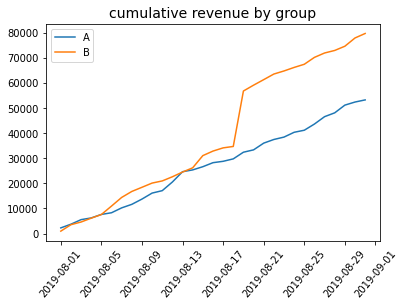

In [35]:
#Let's plot cumulative revenue graphs by day and A/B test group:
cumulativeRevenueA = ordersAggregated[ordersAggregated['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = ordersAggregated[ordersAggregated['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('cumulative revenue by group', fontdict={'size':14})
plt.xticks(rotation=50)

plt.legend() 

<font color='green'>The cumulative metrics of group A are consistently lower than those of group B.

<font color='green'>The graph stabilized only toward the half of the test.

<font color='green'>Revenue is rising steadily throughout the whole test . thats a good sign. 
    
<font color='green'>however we can see that group B doing better the whole way and after the half it just constantly stays in a much higher point . this may imply either a surge in the number od orders or the presence of very expensive orders in the sample

**<font size="3">Graph cumulative average order size by group. Make conclusions and conjectures.**

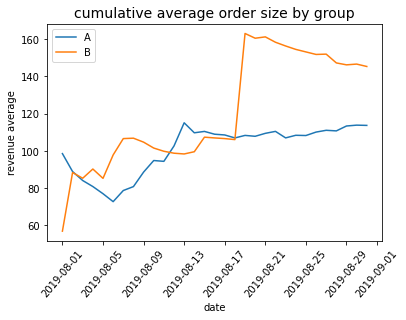

In [36]:
#divide cumulative revenue by the cumulative number of orders
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=50)
plt.legend() 
plt.title('cumulative average order size by group', fontdict={'size':14})
plt.xlabel('date')
plt.ylabel('revenue average')
plt.xticks(rotation=50)
plt.show()

<font color='green'>Average purchase size in not becoming steady during the test, only by the end of it both stater moving dowen together and this might mean that average purchase sizes are droping.
    
<font color='green'>we can see that both groups see splikes in revenue at certain points and it is switching all the time, staying steady around the same values but a small pick for A and a huge pick for B . 

<font color='green'>the surge in group B in the test may have been due  to the presence of large, expensive orders. we need more data on this group to find true average purchase size and establish its level.

<font color='green'>I will recommend to continue testing and see if averege sizes stabelize.though still it looks like there is some kind of a general lead here for group B

**<font size="3">Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.**


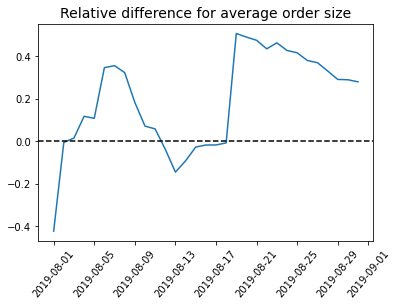

In [37]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Relative difference for average order size', fontdict={'size':14})
plt.xticks(rotation=50)
# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

<font color='green'>At several points the difference between the segments splikes. This means there must be some big orders and outliers.

<font color='green'>Seems like most of timegroup  B is higher then group A and has picks but this also changes allong all the way. 

**<font size="3">Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. 
Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.**

In [38]:
visits_data.head()


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [39]:
number_visits_by_group= pd.pivot_table(visits_data, values='visits', index= 'date', columns= 'group', aggfunc=np.sum)
number_visits_by_group= pd.DataFrame(number_visits_by_group.to_records())
number_visits_by_group.head()

,date,A,B
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [40]:
number_orders_by_group= pd.pivot_table(orders_data_new, values='transactionId', index= 'date', columns= 'group', aggfunc=lambda x: len(x.unique()))
number_orders_by_group= pd.DataFrame(number_orders_by_group.to_records())  
number_orders_by_group.head()

,date,A,B
0,2019-08-01,23,17
1,2019-08-02,19,23
2,2019-08-03,24,14
3,2019-08-04,11,14
4,2019-08-05,22,21


In [41]:
conversion_A= number_orders_by_group['A'] / number_visits_by_group['A']
conversion_B= number_orders_by_group['B'] / number_visits_by_group['B']
dates= number_visits_by_group['date']

print('conversion rate for group A:', conversion_A.head())

print('conversion rate for group B:', conversion_B.head())


print('conversion rate average observation for group A:', statistics.mean(conversion_A))

print('conversion rate average observation for group B:', statistics.mean(conversion_B))


conversion rate for group A: 0    0.031989
1    0.030695
2    0.047337
3    0.015342
4    0.029101
Name: A, dtype: float64
conversion rate for group B: 0    0.023843
1    0.039587
2    0.027505
3    0.018182
4    0.029703
Name: B, dtype: float64
conversion rate average observation for group A: 0.025890306958716497
conversion rate average observation for group B: 0.03042400280520272


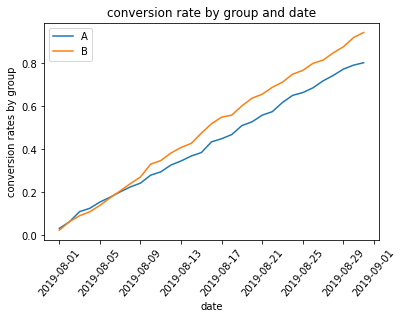

In [42]:
# calculating cumulative conversion
conversion_A_cumu= conversion_A.cumsum()
conversion_B_cumu= conversion_B.cumsum()

# plotting the graphs
plt.plot(dates, conversion_A_cumu, label='A')
plt.plot(dates, conversion_B_cumu, label='B')
plt.legend()
plt.title('conversion rate by group and date', fontdict={'size':12})
plt.xlabel('date')
plt.ylabel('conversion rates by group')
plt.xticks(rotation=50)
plt.show()

<font color='green'>seems stabalized all along the way after the first few days, group B has higher conversion rate

***plotting the graph based on conversions rate without cumsum***


In [43]:
visitorsAggregated = datesGroups.apply(
    lambda x: visits_data[
        np.logical_and(
            visits_data['date'] <= x['date'], visits_data['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitorsAggregated.columns = ['date', 'group', 'visits']

In [44]:
visitorsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [45]:
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

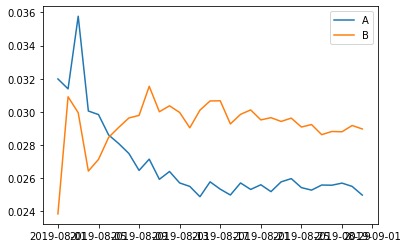

In [46]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

No handles with labels found to put in legend.


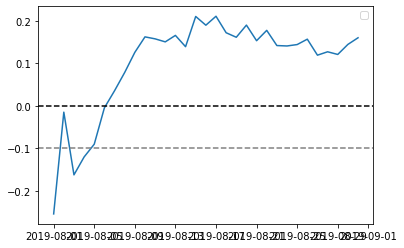

In [47]:
#Let's plot a relative difference graph for the cumulative conversion rates:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

<font color='green'>At the beginning of the test , group B was lagging behind , but then it suddenly took the lead, Then its conversion fell again, and then grew significatly and stayed kind of stable around a high point and leading before A in a very clear way for most of the test.

<font color='green'>In general, the average purchase sizes are not yet stable, seems like in all other parameters group B is really leading above group A, but we are allso afraid there are big outliers, so I recomend to check scores after taking care of those.

**<font size="3">Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.**

In [49]:
ordersByUsers = (
    orders_data_new.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)



,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


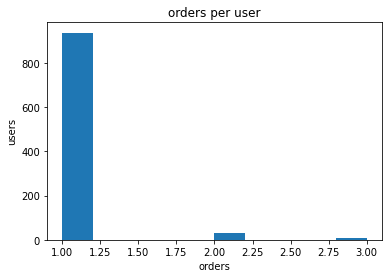

In [50]:
plt.hist(ordersByUsers['orders']) 
plt.title('orders per user', fontdict={'size':12})
plt.xlabel('orders')
plt.ylabel('users')
plt.show()

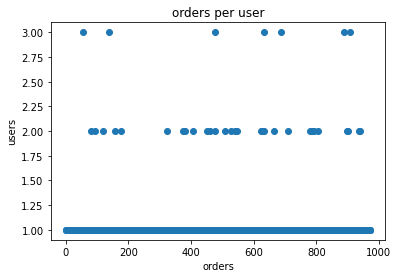

In [51]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('orders per user', fontdict={'size':12})
plt.xlabel('orders')
plt.ylabel('users')
plt.show()

<font color='green'>Most of our users had only 1 order.

<font color='green'>we can see some users ordering 2 orders and just a few ordering 3, those are probably anomalies.
    
<font color='green'>we should think of ways to attract users come back and order more from us.

**<font size="3">Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.**

In [52]:
print('precentiles:90%, 95%, 99%:',np.percentile(ordersByUsers['orders'], [90, 95, 99])) 


precentiles:90%, 95%, 99%: [1. 1. 2.]


<font color='green'>most of our users had only 1 order(95% from our data), only 10% had more and within this 10% we see that only the 1 last precent is having 2 orders or more, so any user ordering more then once is an anomaly.
    
<font color='green'>this returns us to the recomendation of finding ways to attract customers to come back.

**<font size="3">Plot a scatter chart of order prices. Make conclusions and conjectures.**

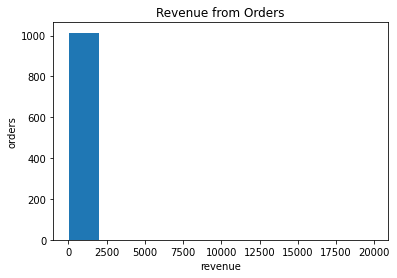

In [53]:
#outliers
plt.hist(orders_data_new['revenue'])
plt.title('Revenue from Orders', fontdict={'size':12})
plt.xlabel('revenue')
plt.ylabel('orders')
plt.show()



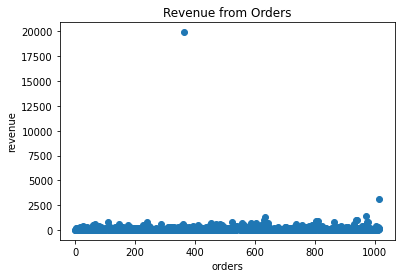

In [54]:
x_values = pd.Series(range(0,len(orders_data_new['revenue'])))
plt.scatter(x_values, orders_data_new['revenue']) 
plt.title('Revenue from Orders', fontdict={'size':12})
plt.xlabel('orders')
plt.ylabel('revenue')
plt.show()

<font color='green'>we can see that most of our observations had revenues lower then 2500 and seems like lower by allot but we cant really tell.
    
<font color='green'>we see 2 anomalie points at around 2500 and 20000. 
    
<font color='green'>we should check if those were mistakes in the data and in general if our service was a one payment for lifetime then we would assume those were mistakes, but from what i understand we are just not that good with keeping costumers and making them want to come and buy more from us.

**<font size="3">Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.**

In [55]:
print('precentiles:90%, 95%, 99%:',np.percentile(orders_data_new['revenue'], [90, 95, 99])) 


precentiles:90%, 95%, 99%: [280.8   414.275 830.3  ]


<font color='green'>We can see that 90% of our observations had revenues lower then 280.8, which means only 10% had more then that. 
    
<font color='green'>within these 10% only 5% had more then 414.275 and 1% over 830.3.
    
<font color='green'>most of our orders are for less then 280. we should look for ways to make the average order bring more revenue.

**<font size="3">Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.**

In [56]:
alpha=0.05
ordersByUsersA = orders_data_new[orders_data_new['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = orders_data_new[orders_data_new['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'transactionId'] 

sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionId'])), name='transactionId')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionId'])), name='transactionId')],axis=0)

print('Relative gain:', "{0:.3f}".format(sampleB.mean()/ sampleA.mean()-1))
result= st.mannwhitneyu(sampleA, sampleB)[1]

print('P-Value:', "{0:.3f}".format(result))
if (result < alpha):
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

Relative gain: 0.160
P-Value: 0.011
We reject the null hypothesis


<font color='green'>Based on the raw data, there is a difference between group A and B and we reject the null hypothesis that they are the same. 
    
<font color='green'>The second row of the output gives us the P-Value 0.011, which is smaller than 0.05 . so we reject the null hypothesis that theres not a statistically signifcant difeerence in conversion between the groups. 
    
<font color='green'>And the relative gain of group B is 16% (the first row of the output)

**<font size="3">Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.**

In [57]:
print('significance_of_difference:', '{0:.3f}'.format(orders_data_new[orders_data_new['group']=='B']['revenue'].mean()/ orders_data_new[orders_data_new['group']=='A']['revenue'].mean()-1))
result= st.mannwhitneyu(orders_data_new[orders_data_new['group']=='A']['revenue'], orders_data_new[orders_data_new['group']=='B']['revenue'])[1]

print('P-Value:', "{0:.3f}".format(result))
if (result < alpha):
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

significance_of_difference: 0.278
P-Value: 0.862
We cant reject the null hypothesis


In [58]:
orders_A= orders_data_new.query('group == "A"')
orders_B= orders_data_new.query('group == "B"')

print('Group A orders revenue mean:', '{:.3f}'.format(orders_A['revenue'].mean()))
print('Group B orders revenue mean:', '{:.3f}'.format(orders_B['revenue'].mean()))


Group A orders revenue mean: 113.701
Group B orders revenue mean: 145.349


<font color='green'>The P-Value (0.862) is considerably higher than 0.05, so there no reason to reject the null hypothesis and conclude that avarege order size differs between the groups.
    
<font color='green'>The avarege order size for group B is bigger than it is for group A at some points and have bigger picks.
    
<font color='green'>0.278 means that the avarege order size for group B is 27.8% bigger then the size of it for group A. 
    
<font color='green'>we can allso see it from just calculating the means that B has a bigger mean. this probably refers to the pick points we saw earlier.

**<font size="3">Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.**

In [59]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactionId'] > 1]['visitorId'], ordersByUsersB[ordersByUsersB['transactionId'] > 1]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders_data_new[orders_data_new['revenue'] > 414.275]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
(86,)


<font color='green'>We have 86 anomalous users in total. thats allot and they really affected our results from the tests.
    
<font color='green'>lets check the results without these anomalies.

In [60]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['transactionId'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionId'])),name='transactionId')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['transactionId'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionId'])),name='transactionId')],axis=0)

print('Relative gain:', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))  

result= st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]     

print('P-Value:', "{0:.3f}".format(result))
if (result < alpha):
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')
      

Relative gain: 0.174
P-Value: 0.016
We reject the null hypothesis


<font color='green'>old results:
    
<font color='green'>Relative gain: 0.160
    
<font color='green'>P-Value: 0.011
    
<font color='green'>The results for conversion almost didnt change and the results are still the same, pvalue is smaller than 0.05. Relative gain in now 17.4%.
    
<font color='green'>We still reject the null hypothesis and meaning the group had differences between them in the results and that our test has a meaning.

**<font size="3">Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.**

In [61]:
print('significance_of_difference:', '{0:.3f}'.format(
    orders_data_new[np.logical_and(orders_data_new['group']=='B', np.logical_not(orders_data_new['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_data_new[np.logical_and(
        orders_data_new['group']=='A',
        np.logical_not(orders_data_new['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))

result= st.mannwhitneyu(
    orders_data_new[np.logical_and(
        orders_data_new['group']=='A', 
        np.logical_not(orders_data_new['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders_data_new[np.logical_and(
         orders_data_new['group']=='B',
         np.logical_not(orders_data_new['visitorId'].isin(abnormalUsers)))]['revenue'])[1]

print('P-Value:', "{0:.3f}".format(result))
if (result < alpha):
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

significance_of_difference: -0.033
P-Value: 0.771
We cant reject the null hypothesis


<font color='green'>old results:
    
<font color='green'>significance_of_difference: 0.278
    
<font color='green'>P-Value: 0.862

<font color='green'>The p-value increased but it doesnt really matters, but now the difference between the segments is -3.3% insted of 27.8%.
    
<font color='green'>we still can't reject the null hypothesis meaning the avarege of order sizes between the groups doesnt have a significant difference.
    
<font color='green'>-0.033 means that the avarege order size for group B is 0.033%  smaller then the size of it for group A.
    
<font color='green'>so, taking care of our anomalies helped us to understand that group A is acctually the leader.

**<font size="3">Make a decision based on the test results. The possible decisions are:**

1.Stop the test, consider one of the groups the leader.

2.Stop the test, conclude that there is no difference between the groups.

3.Continue the test

<font color='green'>From our graphs we conclude that group B has higher cumulative revenue by group and date, and higher cumulative average order size by group and date. also seems like group B has a much better conversion rate.

<font color='green'>When we looked for anomalies we found out that any user whop order more then 1 order or with revenue of more then 414.275, is an anomaly. we will check if these anomalies affected our scores.

<font color='green'>Then we did some tests based on the raw data, there is a difference in conversion between group A to group B.

<font color='green'>Then we test for the significance of the difference in avarege order size between the groups using the raw data and discovered the pvalue is considerably high. so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups but still that group B might have bigger picks.

<font color='green'>Then we find the statistical signifcance of the diference in conversion between the groups using the filtered data, discovering we had 86 outliers. 
    
<font color='green'>The results for conversion almost didnt change and the results are still the same. 

<font color='green'>For the difference in average order size between the groups  using the filltered pvalue increased abit but this didnt change much, now it looks like the average order size of B is just abit smaller then for A if we leave aside our outliers.

<font color='green'>still in general seems like group B is leading

**<font color='green'>from the graphs and tests we could see that model had pretty much stabalised (after taking care of anomalies) and we can say we should stop the test and announce B as the leading group.**